In [30]:
import pandas as pd

In [31]:
df = pd.read_csv('all_train.csv')
df.head()

,# label,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f18,f19,f20,f21,f22,f23,f24,f25,f26,mass
0,1.0,-0.346368,0.416306,0.999236,0.475342,0.427493,-0.005984,1.989833,0.344530,1.566297,...,4.105282,0.267826,0.378718,1.743123,3.406367,4.350537,-0.352571,1.130032,2.227706,1000.0
1,1.0,1.708236,-0.319394,-1.241873,-0.887231,-0.871906,-0.005984,-0.001047,-1.038225,0.655748,...,-1.178141,-0.877361,-1.483769,-0.573682,-1.693781,-0.545062,-0.299118,-0.662942,-0.193019,750.0
2,0.0,-0.360693,1.794174,0.264738,-0.472273,-0.292344,-1.054221,-1.150495,1.423404,1.270098,...,-1.199511,0.539020,-1.590629,-0.573682,-0.543636,-0.937456,-0.300344,-0.523262,-1.506304,750.0
3,1.0,-0.377914,-0.103932,-0.649434,-2.125015,-1.643797,-0.005984,1.011112,-1.040340,-0.541991,...,0.463763,-0.006583,1.089122,-0.573682,-0.276348,-0.409272,-0.349926,-0.307123,0.529698,1250.0
4,0.0,-0.067436,-0.636762,-0.620166,-0.062551,1.588715,-0.005984,-0.595304,-1.238987,0.336844,...,-0.552837,-1.418494,-0.562982,1.743123,0.881802,0.002516,1.560950,-0.150760,-1.023889,750.0


note that the label is 1 / 0 ... this will impact our loss function 

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000000 entries, 0 to 6999999
Data columns (total 29 columns):
 #   Column   Dtype  
---  ------   -----  
 0   # label  float64
 1   f0       float64
 2   f1       float64
 3   f2       float64
 4   f3       float64
 5   f4       float64
 6   f5       float64
 7   f6       float64
 8   f7       float64
 9   f8       float64
 10  f9       float64
 11  f10      float64
 12  f11      float64
 13  f12      float64
 14  f13      float64
 15  f14      float64
 16  f15      float64
 17  f16      float64
 18  f17      float64
 19  f18      float64
 20  f19      float64
 21  f20      float64
 22  f21      float64
 23  f22      float64
 24  f23      float64
 25  f24      float64
 26  f25      float64
 27  f26      float64
 28  mass     float64
dtypes: float64(29)
memory usage: 1.5 GB


no missing values

In [33]:
df.isna().sum()

# label    0
f0         0
f1         0
f2         0
f3         0
f4         0
f5         0
f6         0
f7         0
f8         0
f9         0
f10        0
f11        0
f12        0
f13        0
f14        0
f15        0
f16        0
f17        0
f18        0
f19        0
f20        0
f21        0
f22        0
f23        0
f24        0
f25        0
f26        0
mass       0
dtype: int64

In [34]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
# label,7000000.0,0.500126,0.500000,0.000000,0.000000,1.000000,1.000000,1.000000
f0,7000000.0,0.016125,1.004417,-1.960549,-0.728821,-0.039303,0.690080,4.378282
f1,7000000.0,0.000477,0.997486,-2.365355,-0.733255,0.000852,0.734783,2.365287
f2,7000000.0,0.000027,1.000080,-1.732165,-0.865670,0.000320,0.865946,1.732370
f3,7000000.0,0.010561,0.995600,-9.980274,-0.609229,0.019633,0.679882,4.148023
f4,7000000.0,-0.000105,0.999867,-1.732137,-0.865802,-0.000507,0.865765,1.731978
f5,7000000.0,0.002766,1.000957,-1.054221,-1.054221,-0.005984,0.850488,4.482618
f6,7000000.0,0.018160,0.986775,-3.034787,-0.756609,-0.149953,0.768669,3.720345
f7,7000000.0,0.000025,0.996587,-2.757853,-0.701415,-0.000107,0.701319,2.758590
f8,7000000.0,0.000435,1.000007,-1.732359,-0.865654,0.001385,0.866598,1.731450


In [35]:
df.rename(columns={'# label': 'target'}, inplace=True)
df['target'] = df['target'].astype(int)

In [36]:
df['target'].value_counts()

1    3500879
0    3499121
Name: target, dtype: int64

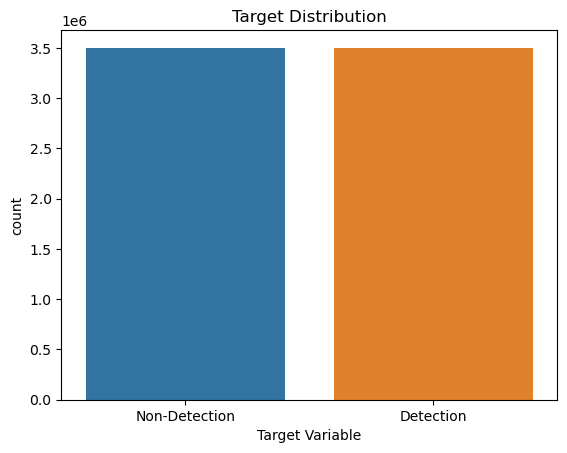

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(data = df, x = 'target')
plt.title('Target Distribution')
plt.xlabel('Target Variable')
plt.xticks(ticks=[0,1],labels= ['Non-Detection','Detection'])
plt.show()

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('target', axis=1)
y = df['target']

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, train_size=.8, random_state=12)

In [39]:
X_train.shape

(5600000, 28)

In [40]:
import tensorflow as tf
import numpy as np

dnn = tf.keras.Sequential()

dnn.add(tf.keras.Input(shape = (28,)))
dnn.add(tf.keras.layers.Dense(32, activation = 'relu'))
dnn.add(tf.keras.layers.Dense(32, activation='relu'))
dnn.add(tf.keras.layers.Dense(1, activation='sigmoid'))

dnn.compile(optimizer='adam', loss = 'BinaryCrossentropy', metrics=['accuracy']) # string loss gives us default params where from_logits is set to false

In [41]:
from tensorflow.keras.callbacks import EarlyStopping

saftey = EarlyStopping(monitor = 'val_loss', patience = 5)
history = dnn.fit(X_train, y_train, epochs=1000, batch_size=200, callbacks=[saftey],validation_split=.2) 

Epoch 1/1000
22400/22400 [==============================] - 28s 1ms/step - loss: 0.2889 - accuracy: 0.8663 - val_loss: 0.2798 - val_accuracy: 0.8722
Epoch 2/1000
22400/22400 [==============================] - 27s 1ms/step - loss: 0.2774 - accuracy: 0.8734 - val_loss: 0.2762 - val_accuracy: 0.8749
Epoch 3/1000
22400/22400 [==============================] - 27s 1ms/step - loss: 0.2750 - accuracy: 0.8749 - val_loss: 0.2759 - val_accuracy: 0.8752
Epoch 4/1000
22400/22400 [==============================] - 27s 1ms/step - loss: 0.2736 - accuracy: 0.8758 - val_loss: 0.2728 - val_accuracy: 0.8767
Epoch 5/1000
22400/22400 [==============================] - 27s 1ms/step - loss: 0.2725 - accuracy: 0.8764 - val_loss: 0.2724 - val_accuracy: 0.8770
Epoch 6/1000
22400/22400 [==============================] - 27s 1ms/step - loss: 0.2719 - accuracy: 0.8768 - val_loss: 0.2718 - val_accuracy: 0.8769
Epoch 7/1000
22400/22400 [==============================] - 27s 1ms/step - loss: 0.2713 - accuracy: 0.8770

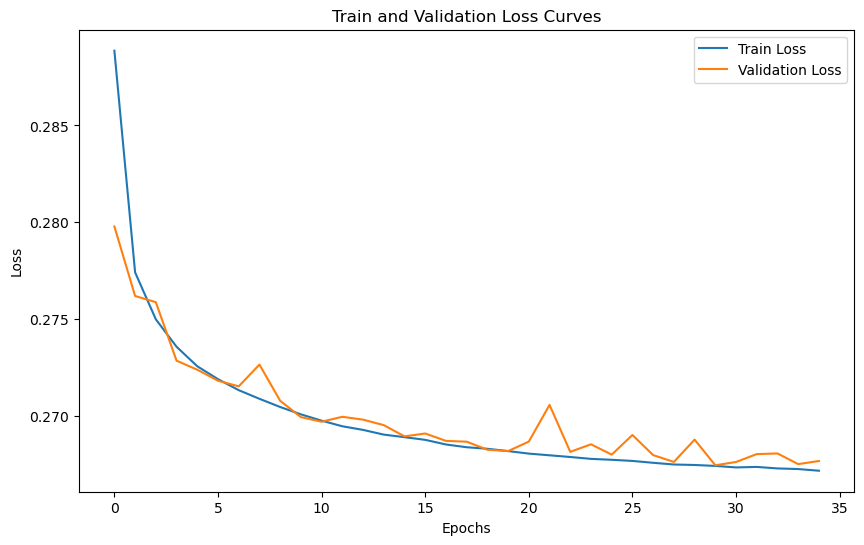

In [42]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Train and Validation Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [43]:
from sklearn.metrics import accuracy_score

y_pred_prob = dnn.predict(X_test).flatten()

acc = []

threshold = np.linspace(0,1,100)

for t in threshold:
    y_pred = (y_pred_prob > t).astype(int)
    accuracies = accuracy_score(y_test,y_pred)
    acc.append(accuracies)

max_accuracy_thres = threshold[np.argmax(acc)]
print(f'Threshold that maximizes accuracy: {max_accuracy_thres}')

43750/43750 [==============================] - 27s 615us/step
Threshold that maximizes accuracy: 0.5050505050505051


In [44]:
y_pred = (y_pred_prob > 0.5353535353535354).astype(int)

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.88    699977
           1       0.87      0.89      0.88    700023

    accuracy                           0.88   1400000
   macro avg       0.88      0.88      0.88   1400000
weighted avg       0.88      0.88      0.88   1400000



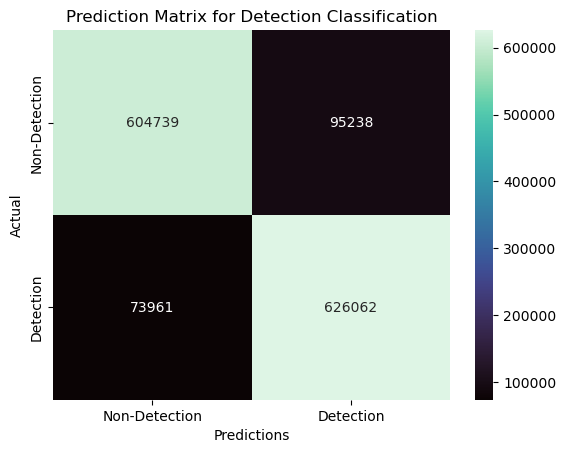

In [45]:
from sklearn.metrics import classification_report, confusion_matrix

pred_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(pred_matrix, annot=True, cmap = 'mako', fmt='.0f')
plt.title('Prediction Matrix for Detection Classification')
plt.xlabel('Predictions')
plt.xticks(ticks=[.5,1.5], labels=['Non-Detection','Detection'])
plt.ylabel('Actual')
plt.yticks(ticks=[0.5,1.5],labels=['Non-Detection','Detection'])

print('Classification Report:\n', classification_report(y_test,y_pred))

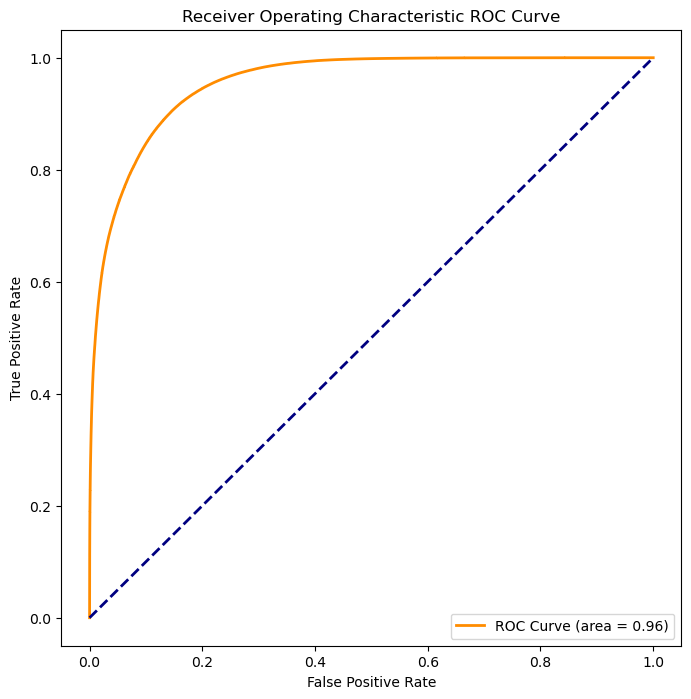

In [46]:
from sklearn.metrics import roc_curve, auc

fpr, tpr,thresholds = roc_curve(y_test,y_pred_prob)
roc_auc = auc(fpr,tpr)

plt.figure(figsize=(8,8))
lw = 2
plt.plot(fpr,tpr,color = 'darkorange', lw=lw, label = 'ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1], color = 'navy',lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic ROC Curve')
plt.legend(loc='lower right')
plt.show()